In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Step 2: Load Data
data = pd.read_csv('data\clustered_vgchartz_2024.csv')

# Display the first few rows of the dataset
data.head()


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HARRY\AppData\Local\Temp\ipykernel_9992\3502654257.py:2: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('data\clustered_vgchartz_2024.csv')


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,cluster
0,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2
1,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2
2,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,2
3,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,2
4,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,2


In [3]:
# Step 3: Select Features and Target Variable
features = ['genre', 'critic_score', 'publisher', 'cluster']
target = 'total_sales'

X = data[features]
y = data[target]

# Discretize the target variable into bins for classification
sales_bins = pd.cut(y, bins=5, labels=[0, 1, 2, 3, 4])
y_class = sales_bins


In [4]:
# Step 4: Preprocess Data for Modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=0)

numeric_features = ['critic_score']
categorical_features = ['genre', 'publisher', 'cluster']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [5]:
# Step 5: Build and Train the Regression Model
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

regression_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['critic_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'publisher',
                                                   'cluster'])])),
                ('regressor', LinearRegression())])

In [6]:
# Step 6: Evaluate the Regression Model
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 4.481520209802395
R^2 Score: 0.34444948089212535


In [7]:
# Step 7: Build and Train the Classification Model
classification_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

classification_model.fit(X_train_class, y_train_class)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['critic_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'publisher',
                                                   'cluster'])])),
                ('classifier', RandomForestClassifier())])

In [8]:
# Step 8: Evaluate the Classification Model
y_pred_class = classification_model.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')


Classification Accuracy: 0.8925619834710744


In [10]:
# Step 9: Function for Random Prediction
def make_random_prediction(model, data):
    genres = data['genre'].unique()
    publishers = data['publisher'].unique()
    clusters = data['cluster'].unique()

    random_genre = random.choice(genres)
    random_critic_score = random.uniform(60, 99)  # Updated range for critic score
    random_publisher = random.choice(publishers)
    random_cluster = random.choice(clusters)

    random_data = pd.DataFrame({
        'genre': [random_genre],
        'critic_score': [random_critic_score],
        'publisher': [random_publisher],
        'cluster': [random_cluster]
    })

    prediction = model.predict(random_data)
    return {
        'Genre': random_genre,
        'Critic Score': random_critic_score,
        'Publisher': random_publisher,
        'Cluster': random_cluster,
        'Predicted Sales': prediction[0]
    }

# Make a random prediction
random_prediction = make_random_prediction(regression_model, data)
print('Random Prediction:', random_prediction)


Random Prediction: {'Genre': 'Misc', 'Critic Score': 84.07614369701194, 'Publisher': 'Outright Games', 'Cluster': np.int64(1), 'Predicted Sales': np.float64(30.032266241166425)}


ValueError: Could not interpret value `eu_sales` for `y`. An entry with this name does not appear in `data`.

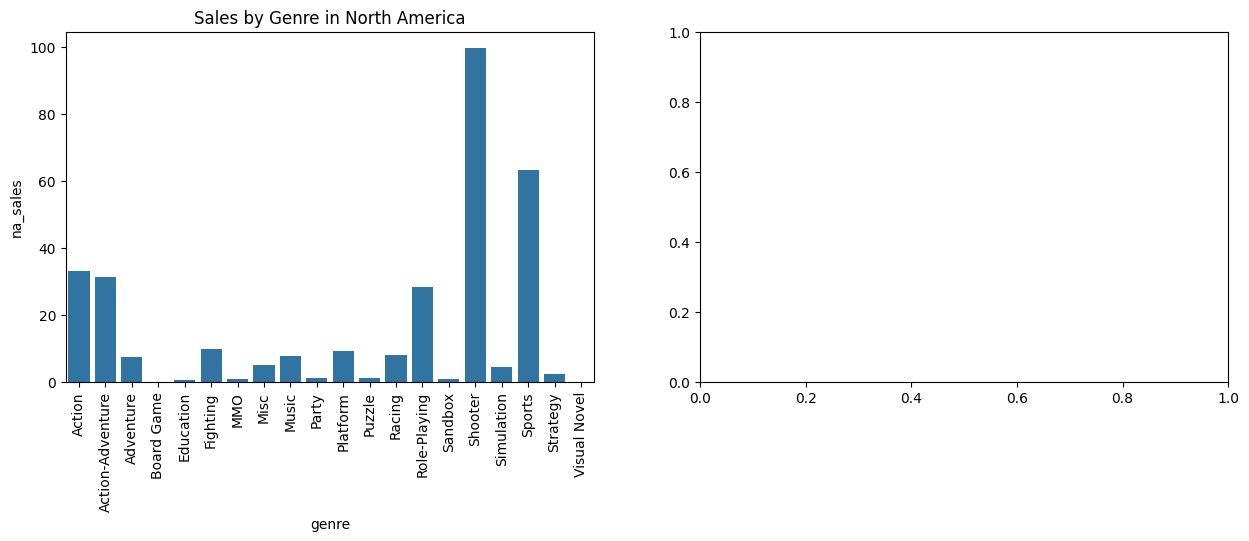

In [15]:
# Step 10: Analyze Sales by Genre and Region
region_columns = ['na_sales', 'pal_sales', 'jp_sales', 'other_sales']
sales_by_genre_region = data.groupby('genre')[region_columns].sum().reset_index()

# Plot sales distribution by genre and region
plt.figure(figsize=(15, 10))

# Plot for North America sales
plt.subplot(2, 2, 1)
sns.barplot(data=sales_by_genre_region, x='genre', y='na_sales')
plt.title('Sales by Genre in North America')
plt.xticks(rotation=90)

# Plot for Europe sales
plt.subplot(2, 2, 2)
sns.barplot(data=sales_by_genre_region, x='genre', y='eu_sales')
plt.title('Sales by Genre in Europe')
plt.xticks(rotation=90)

# Plot for Japan sales
plt.subplot(2, 2, 3)
sns.barplot(data=sales_by_genre_region, x='genre', y='jp_sales')
plt.title('Sales by Genre in Japan')
plt.xticks(rotation=90)

# Plot for Other regions sales
plt.subplot(2, 2, 4)
sns.barplot(data=sales_by_genre_region, x='genre', y='other_sales')
plt.title('Sales by Genre in Other Regions')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
